In [71]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

from quantum_beauty_class import qm_beautycontest

np.random.seed(42)
random.seed(42)


In [72]:
#Input
num_players = 100
num_states = 100
mutation_rate = 0.5
mutation_strength = 0.01
contr_factor = 0.01
fitness_type = 'avg'
measurement_type = 'avg'
num_elite = 20

num_rounds = 1000

#Measured data
times_won = np.zeros(num_players)
times_elite = np.zeros(num_players)
winning_exp_val = np.zeros(num_rounds)
winning_std_val = np.zeros(num_rounds)
measured_states = np.zeros(num_rounds)
winning_weights = np.zeros((num_states, num_rounds))

In [73]:
#Run measurement
QMB = qm_beautycontest(num_players, num_states, mutation_rate, mutation_strength, contr_factor, fitness_type, num_elite)

for j in tqdm(range(num_rounds)):
    QMB.play_round()
    measured_states[j] = QMB.measured_state
    for i in QMB.elite:
        times_elite[i] += 1
    times_won[QMB.winner] += 1
    winning_exp_val[j] = QMB.players[QMB.winner].comp_exp_val()
    winning_std_val[j] = QMB.players[QMB.winner].comp_std_val()
    winning_weights[:, j] = QMB.players[QMB.winner].comp_weights()

max_age_strat = QMB.max_age_strat

100%|██████████| 100000/100000 [13:10<00:00, 126.49it/s]


19


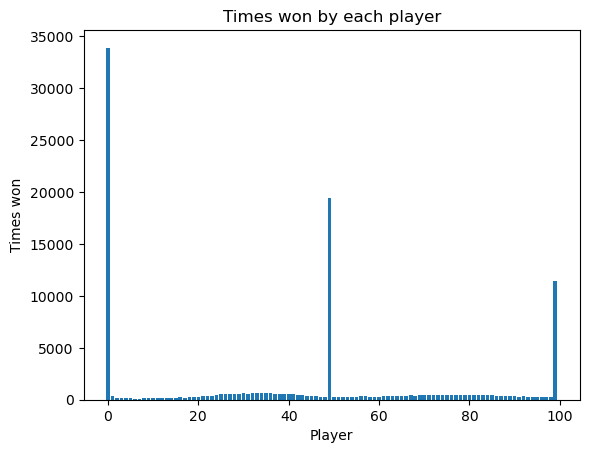

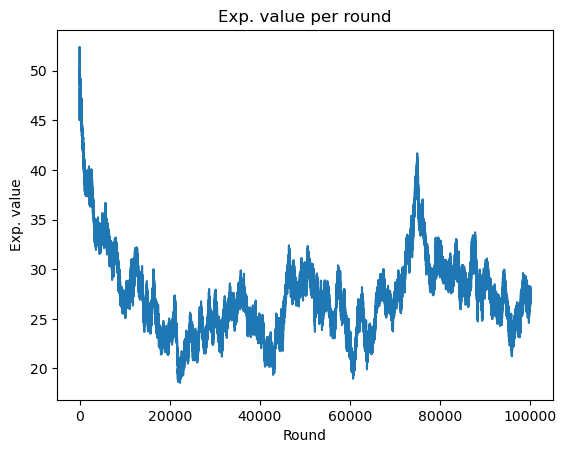

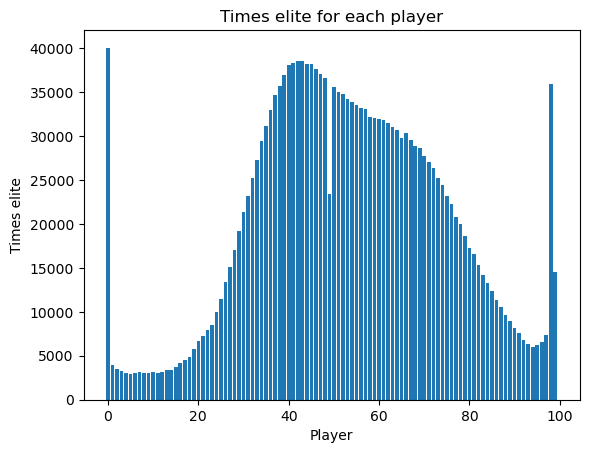

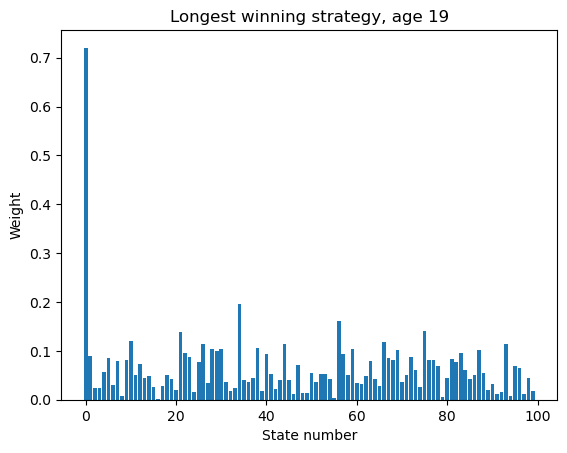

In [74]:
#Plot results
rounds = np.arange(num_rounds)
players = np.arange(num_players)
states = np.arange(num_states)


fig1, ax1 = plt.subplots()
ax1.bar(players, times_won)
ax1.set_title('Times won by each player')
ax1.set_xlabel('Player')
ax1.set_ylabel('Times won')
#fig1.savefig('Plots/times_won')

fig2, ax2 = plt.subplots()
ax2.plot(rounds, winning_exp_val)
ax2.set_title('Exp. value per round')
ax2.set_xlabel('Round')
ax2.set_ylabel('Exp. value')
#fig2.savefig('Plots/exp_value')

fig3, ax3 = plt.subplots()
ax3.bar(players, times_elite)
ax3.set_title('Times elite for each player')
ax3.set_xlabel('Player')
ax3.set_ylabel('Times elite')
#fig3.savefig('Plots/times_elite')

fig4, ax4 = plt.subplots()
ax4.bar(states, max_age_strat)
ax4.set_title('Longest winning strategy, age ' + str(QMB.max_age))
ax4.set_xlabel('State number')
ax4.set_ylabel('Weight')
#fig4.savefig('Plots/long_strat')

print(QMB.max_age)